# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она работает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [159]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 33.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 31.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 41.4MB/s]


In [500]:
data = pd.read_csv('./train.csv')

In [560]:
X_test = pd.read_csv('./test.csv')

In [464]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [313]:
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [465]:
X_origin=data.drop(columns=target_col)

In [314]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [315]:
data.isna().sum()

,0
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


Как видим, NaN значений нет, что очень хорошо


In [316]:
sorted(data['ClientPeriod'].unique())[:5]

[0, 1, 2, 3, 4]

In [317]:
sorted(data['MonthlySpending'].unique())[:5]

[18.25, 18.4, 18.7, 18.8, 18.85]

In [318]:
sorted(data['TotalSpent'].unique())[:5]

[' ', '100.2', '100.25', '100.35', '100.4']

Как можем заметить, все-таки в колонке TotalSpent есть пустые значения. Поэтому их надо обработать. Заменим эти пустые значения не среднее

In [319]:
len(data[data['TotalSpent'] == ' '])

9

In [564]:
data['TotalSpent'] = data['TotalSpent'].replace(' ', np.NaN)
X_test['TotalSpent'] = X_test['TotalSpent'].replace(' ', np.NaN)

In [565]:
data['TotalSpent'] = data['TotalSpent'].apply(lambda x: float(x))
X_test['TotalSpent'] = X_test['TotalSpent'].apply(lambda x: float(x))

In [412]:
data['TotalSpent'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5282 entries, 0 to 5281
Series name: TotalSpent
Non-Null Count  Dtype  
--------------  -----  
5273 non-null   float64
dtypes: float64(1)
memory usage: 41.4 KB


In [566]:
data['TotalSpent'].fillna(data['TotalSpent'].mean(), inplace=True)
X_test['TotalSpent'].fillna(data['TotalSpent'].mean(), inplace=True)

<ipython-input-566-b25080532374>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalSpent'].fillna(data['TotalSpent'].mean(), inplace=True)
<ipython-input-566-b25080532374>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [440]:
data['TotalSpent'].isna().sum()

0

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

**Численные признаки**

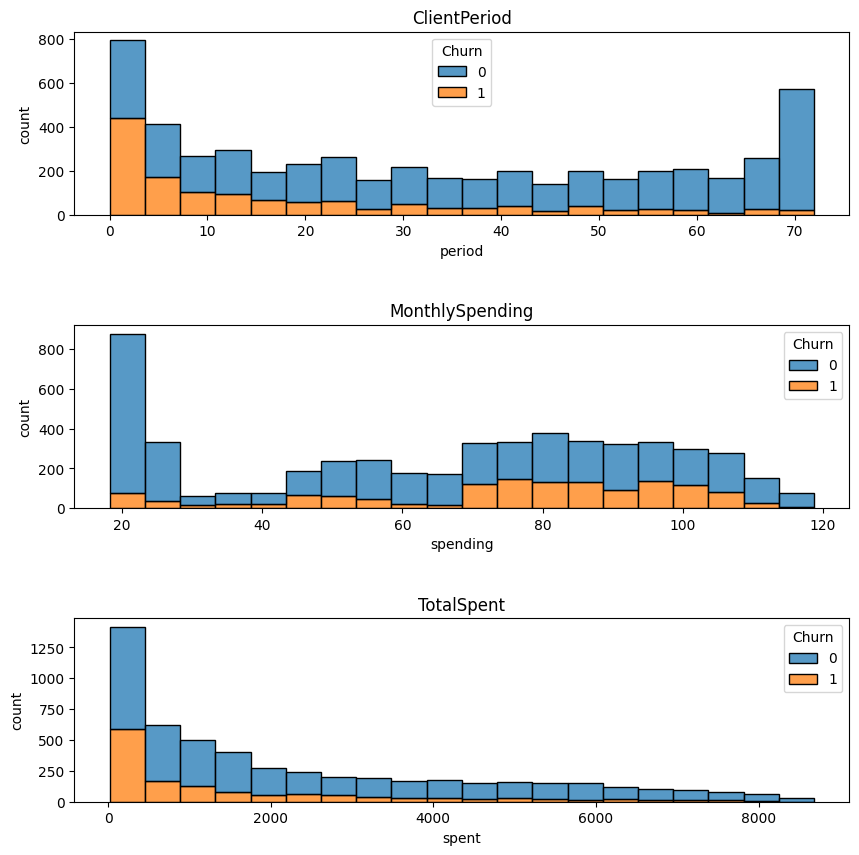

In [209]:
fig, axes = plt.subplots(3, figsize=(10, 10))
plt.subplots_adjust(hspace=0.6)

sns.histplot(data, x='ClientPeriod', hue='Churn', multiple='stack', ax=axes[0], bins=20)
axes[0].set_title('ClientPeriod')
axes[0].set_xlabel('period')
axes[0].set_ylabel('count')
sns.histplot(data, x='MonthlySpending', hue='Churn', multiple='stack', ax=axes[1], bins=20)
axes[1].set_title('MonthlySpending')
axes[1].set_xlabel('spending')
axes[1].set_ylabel('count')
sns.histplot(data, x='TotalSpent', hue='Churn', multiple='stack', ax=axes[2], bins=20)
axes[2].set_title('TotalSpent')
axes[2].set_xlabel('spent')
axes[2].set_ylabel('count')

plt.show()

In [210]:
data[num_cols].describe()

,ClientPeriod,MonthlySpending,TotalSpent
count,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2291.390461
std,24.550326,30.176464,2267.079956
min,0.000000,18.250000,18.800000
25%,9.000000,35.462500,401.587500
50%,29.000000,70.400000,1413.650000
75%,55.000000,90.050000,3795.212500
max,72.000000,118.750000,8684.800000


**Категориальные признаки**

In [211]:
cat_cols

['Sex',
 'IsSeniorCitizen',
 'HasPartner',
 'HasChild',
 'HasPhoneService',
 'HasMultiplePhoneNumbers',
 'HasInternetService',
 'HasOnlineSecurityService',
 'HasOnlineBackup',
 'HasDeviceProtection',
 'HasTechSupportAccess',
 'HasOnlineTV',
 'HasMovieSubscription',
 'HasContractPhone',
 'IsBillingPaperless',
 'PaymentMethod']

In [212]:
data['Sex'].value_counts()

,count
Sex,
Male,2655
Female,2627


In [213]:
data['IsSeniorCitizen'].value_counts()

,count
IsSeniorCitizen,
0,4440
1,842


In [214]:
data['HasPartner'].value_counts()

,count
HasPartner,
No,2705
Yes,2577


In [215]:
data['HasChild'].value_counts()

,count
HasChild,
No,3676
Yes,1606


In [216]:
data['HasPhoneService'].value_counts()

,count
HasPhoneService,
Yes,4761
No,521


In [217]:
data['HasMultiplePhoneNumbers'].value_counts()

,count
HasMultiplePhoneNumbers,
No,2511
Yes,2250
No phone service,521


In [218]:
data['HasInternetService'].value_counts()

,count
HasInternetService,
Fiber optic,2341
DSL,1800
No,1141


In [219]:
data['HasOnlineSecurityService'].value_counts()

,count
HasOnlineSecurityService,
No,2612
Yes,1529
No internet service,1141


In [220]:
data['HasOnlineBackup'].value_counts()

,count
HasOnlineBackup,
No,2332
Yes,1809
No internet service,1141


In [221]:
data['HasDeviceProtection'].value_counts()

,count
HasDeviceProtection,
No,2317
Yes,1824
No internet service,1141


In [222]:
data['HasTechSupportAccess'].value_counts()

,count
HasTechSupportAccess,
No,2604
Yes,1537
No internet service,1141


In [223]:
data['HasOnlineTV'].value_counts()

,count
HasOnlineTV,
No,2099
Yes,2042
No internet service,1141


In [224]:
data['HasMovieSubscription'].value_counts()

,count
HasMovieSubscription,
No,2081
Yes,2060
No internet service,1141


In [225]:
data['HasContractPhone'].value_counts()

,count
HasContractPhone,
Month-to-month,2920
Two year,1280
One year,1082


In [226]:
data['IsBillingPaperless'].value_counts()

,count
IsBillingPaperless,
Yes,3148
No,2134


In [227]:
data['PaymentMethod'].value_counts()

,count
PaymentMethod,
Electronic check,1786
Mailed check,1194
Bank transfer (automatic),1159
Credit card (automatic),1143


Заменим ненужные значения в признаках

In [504]:
data['HasMultiplePhoneNumbers'] = data['HasMultiplePhoneNumbers'].replace('No phone service', 'No')
data['HasOnlineSecurityService'] = data['HasOnlineSecurityService'].replace('No internet service', 'No')
data['HasOnlineBackup'] = data['HasOnlineBackup'].replace('No internet service', 'No')
data['HasDeviceProtection'] = data['HasDeviceProtection'].replace('No internet service', 'No')
data['HasTechSupportAccess'] = data['HasTechSupportAccess'].replace('No internet service', 'No')
data['HasOnlineTV'] = data['HasOnlineTV'].replace('No internet service', 'No')
data['HasMovieSubscription'] = data['HasMovieSubscription'].replace('No internet service', 'No')

In [568]:
X_test['HasMultiplePhoneNumbers'] = X_test['HasMultiplePhoneNumbers'].replace('No phone service', 'No')
X_test['HasOnlineSecurityService'] = X_test['HasOnlineSecurityService'].replace('No internet service', 'No')
X_test['HasOnlineBackup'] = X_test['HasOnlineBackup'].replace('No internet service', 'No')
X_test['HasDeviceProtection'] = X_test['HasDeviceProtection'].replace('No internet service', 'No')
X_test['HasTechSupportAccess'] = X_test['HasTechSupportAccess'].replace('No internet service', 'No')
X_test['HasOnlineTV'] = X_test['HasOnlineTV'].replace('No internet service', 'No')
X_test['HasMovieSubscription'] = X_test['HasMovieSubscription'].replace('No internet service', 'No')

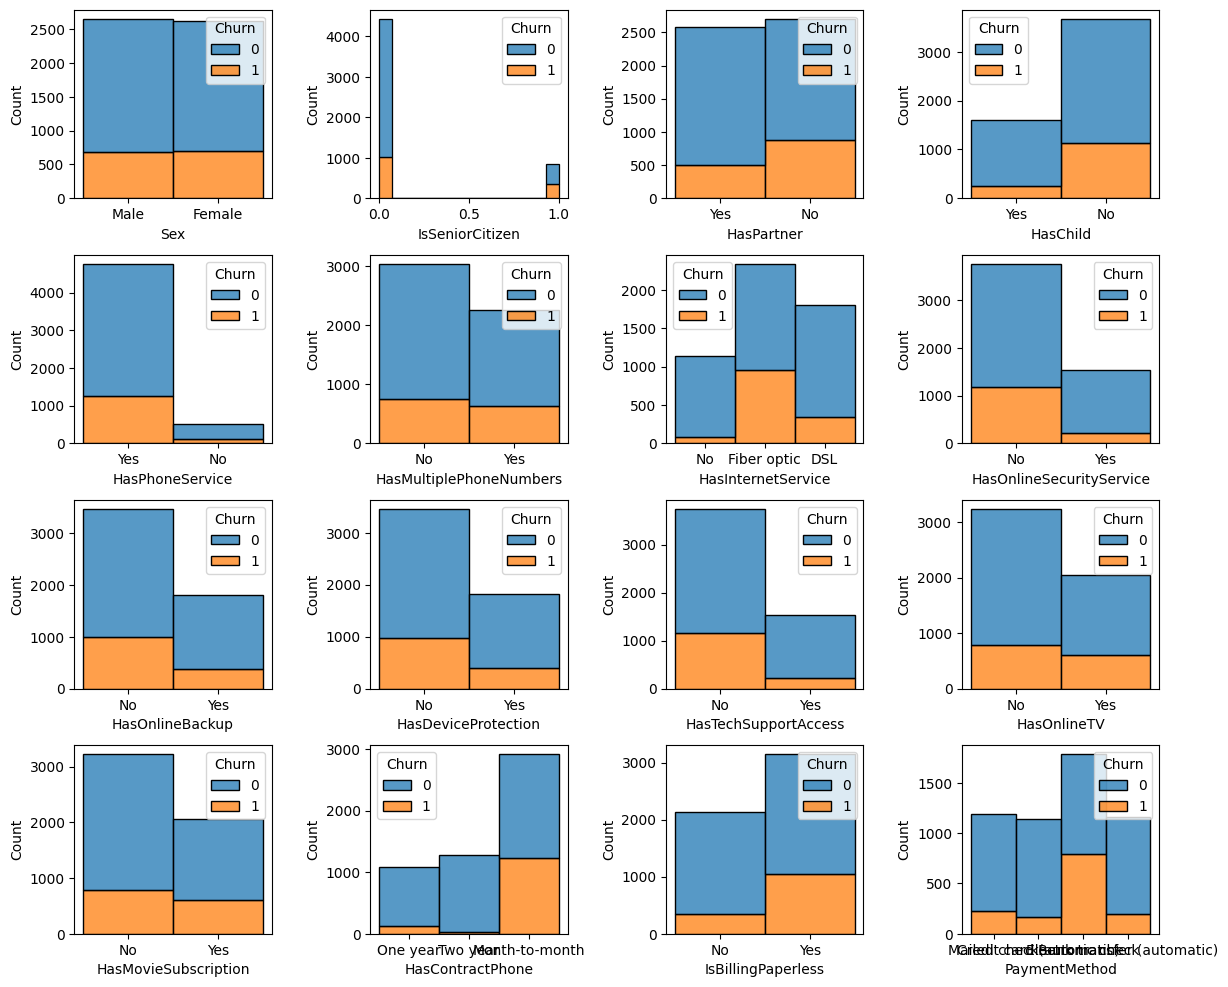

In [229]:
fig, axes = plt.subplots(4, 4, figsize=(14, 12))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
sns.histplot(data, x='Sex', hue='Churn', multiple='stack', ax=axes[0, 0])
sns.histplot(data, x='IsSeniorCitizen', hue='Churn', multiple='stack', ax=axes[0, 1])
sns.histplot(data, x='HasPartner', hue='Churn', multiple='stack', ax=axes[0, 2])
sns.histplot(data, x='HasChild', hue='Churn', multiple='stack', ax=axes[0, 3])
sns.histplot(data, x='HasPhoneService', hue='Churn', multiple='stack', ax=axes[1, 0])
sns.histplot(data, x='HasMultiplePhoneNumbers', hue='Churn', multiple='stack', ax=axes[1, 1])
sns.histplot(data, x='HasInternetService', hue='Churn', multiple='stack', ax=axes[1, 2])
sns.histplot(data, x='HasOnlineSecurityService', hue='Churn', multiple='stack', ax=axes[1, 3])
sns.histplot(data, x='HasOnlineBackup', hue='Churn', multiple='stack', ax=axes[2, 0])
sns.histplot(data, x='HasDeviceProtection', hue='Churn', multiple='stack', ax=axes[2, 1])
sns.histplot(data, x='HasTechSupportAccess', hue='Churn', multiple='stack', ax=axes[2, 2])
sns.histplot(data, x='HasOnlineTV', hue='Churn', multiple='stack', ax=axes[2, 3])
sns.histplot(data, x='HasMovieSubscription', hue='Churn', multiple='stack', ax=axes[3, 0])
sns.histplot(data, x='HasContractPhone', hue='Churn', multiple='stack', ax=axes[3, 1])
sns.histplot(data, x='IsBillingPaperless', hue='Churn', multiple='stack', ax=axes[3, 2])
sns.histplot(data, x='PaymentMethod', hue='Churn', multiple='stack', ax=axes[3, 3])

plt.show()

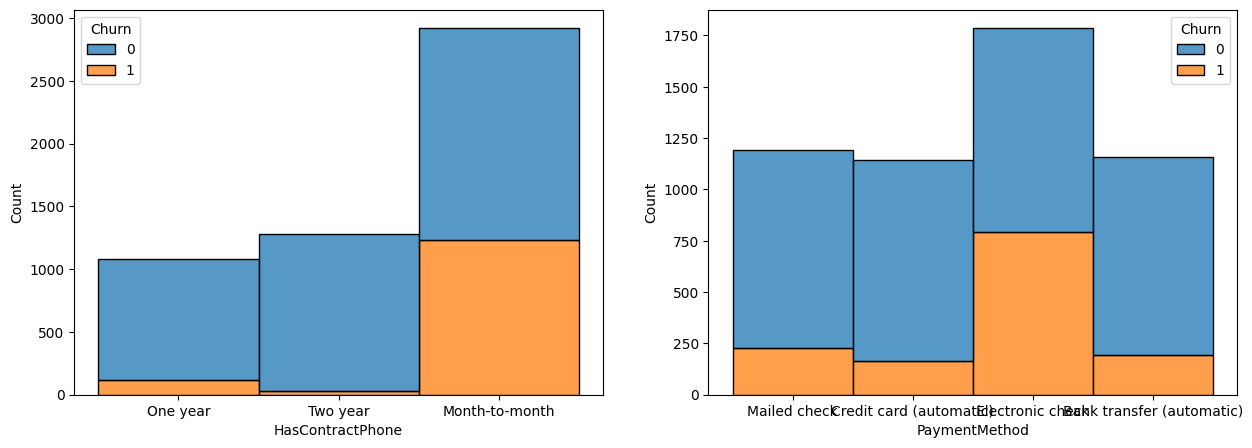

In [230]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data, x='HasContractPhone', hue='Churn', multiple='stack', ax=axes[0])
sns.histplot(data, x='PaymentMethod', hue='Churn', multiple='stack', ax=axes[1])

plt.show()

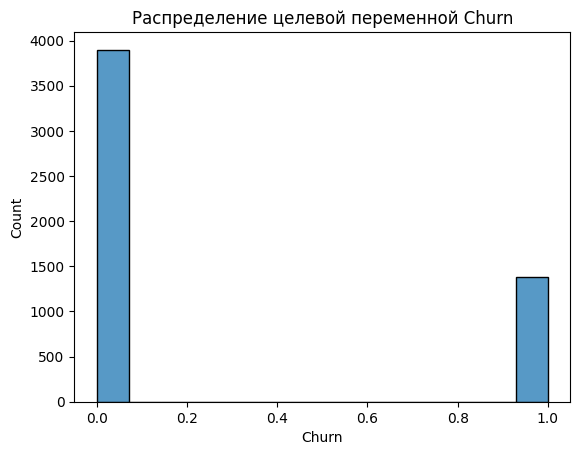

In [231]:
sns.histplot(data, x='Churn')
plt.title('Распределение целевой переменной Churn')
plt.show()

Как можно увидеть, классы не являются сбалансированными. Но мы будем использовать метрику ROC-AUC, поскольку она работает даже если классы в данных сильно несбалансированны

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа превращаем в one-hot вектора.)

In [553]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

Обработаем категориальные признаки. Для этого признаки, где всего принимается 2 значения (пол, признаки с да-нет) приведем к виду 0 или 1, а остальные закодируем one-hot-encoding'ом

In [470]:
cat_cols

['Sex',
 'IsSeniorCitizen',
 'HasPartner',
 'HasChild',
 'HasPhoneService',
 'HasMultiplePhoneNumbers',
 'HasInternetService',
 'HasOnlineSecurityService',
 'HasOnlineBackup',
 'HasDeviceProtection',
 'HasTechSupportAccess',
 'HasOnlineTV',
 'HasMovieSubscription',
 'HasContractPhone',
 'IsBillingPaperless',
 'PaymentMethod']

In [569]:
data['Sex'] = data['Sex'].replace('Male', 1)
data['Sex'] = data['Sex'].replace('Female', 0)
X_test['Sex'] = X_test['Sex'].replace('Male', 1)
X_test['Sex'] = X_test['Sex'].replace('Female', 0)

cat_cols2 = ['IsSeniorCitizen',
 'HasPartner',
 'HasChild',
 'HasPhoneService',
 'HasMultiplePhoneNumbers',
 'HasOnlineSecurityService',
 'HasOnlineBackup',
 'HasDeviceProtection',
 'HasTechSupportAccess',
 'HasOnlineTV',
 'HasMovieSubscription',
 'IsBillingPaperless']
data[cat_cols2] = data[cat_cols2].replace('Yes', 1)
data[cat_cols2] = data[cat_cols2].replace('No', 0)
X_test[cat_cols2] = X_test[cat_cols2].replace('Yes', 1)
X_test[cat_cols2] = X_test[cat_cols2].replace('No', 0)

data.head()

<ipython-input-569-b19dcd03b939>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test['Sex'] = X_test['Sex'].replace('Female', 0)
<ipython-input-569-b19dcd03b939>:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test[cat_cols2] = X_test[cat_cols2].replace('No', 0)


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,1,0,1,1,1,0,No,0,0,0,0,0,0,One year,0,Mailed check,0
1,72,25.85,1872.20,1,0,1,0,1,1,No,0,0,0,0,0,0,Two year,0,Credit card (automatic),0
2,1,75.90,75.90,1,0,0,0,1,0,Fiber optic,0,0,0,1,0,0,Month-to-month,1,Electronic check,1
3,32,79.30,2570.00,0,1,1,0,1,1,Fiber optic,0,0,1,0,0,0,Month-to-month,0,Mailed check,0
4,60,115.25,6758.45,0,0,1,1,1,1,Fiber optic,1,1,1,1,1,1,Two year,0,Credit card (automatic),0


In [510]:
X_origin = data.drop(columns=target_col)

In [572]:
encoder = OneHotEncoder(sparse_output=False)

enc_cols = ['HasInternetService', 'HasContractPhone', 'PaymentMethod']
one_hot_encoded = encoder.fit_transform(data[enc_cols])
one_hot_data = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(enc_cols), index=data.index)

one_hot_encoded_test = encoder.transform(X_test[enc_cols])
one_hot_X_test = pd.DataFrame(one_hot_encoded_test, columns=encoder.get_feature_names_out(enc_cols), index=X_test.index)

In [329]:
one_hot_data

,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5277,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5278,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5279,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5280,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [573]:
data.drop(columns=enc_cols, inplace=True)
X_test.drop(columns=enc_cols, inplace=True)

In [574]:
data_encoded = pd.concat([data, one_hot_data], axis=1)
X_test = pd.concat([X_test, one_hot_X_test], axis=1)

In [423]:
data_encoded

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasOnlineSecurityService,...,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,1,0,1,1,1,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,72,25.85,1872.20,1,0,1,0,1,1,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,75.90,75.90,1,0,0,0,1,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,32,79.30,2570.00,0,1,1,0,1,1,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,60,115.25,6758.45,0,0,1,1,1,1,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,1,0,0,0,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5278,50,44.45,2188.45,1,0,1,0,0,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5279,1,55.05,55.05,1,0,0,0,1,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5280,29,76.00,2215.25,0,0,0,0,1,1,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [475]:
X = data_encoded.drop(columns=['Churn'])
y = data_encoded['Churn']

In [476]:
X_train, X_val, y_train, y_val = train_test_split(X.values, y.values, shuffle=True, test_size=0.2, random_state=42)

In [578]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Сначала попробуем использовать LogisticRegressionCV, а потом сами переберем значения параметра C

In [540]:
log_reg_cv = LogisticRegressionCV(cv=5, scoring='roc_auc', refit=True, Cs=[100, 10, 1, 0.1, 0.01, 0.001])
log_reg_cv.fit(X_train_scaled, y_train)

LogisticRegressionCV(Cs=[100, 10, 1, 0.1, 0.01, 0.001], cv=5, scoring='roc_auc')

In [542]:
roc_auc_score(y_val, log_reg_cv.predict_proba(X_val_scaled)[:, 1])

0.8270102788116105

C=100

In [387]:
log_reg100 = LogisticRegression(C=100)
log_reg100.fit(X_train_scaled, y_train)

LogisticRegression(C=100)

In [388]:
roc_auc_score(y_val, log_reg100.predict_proba(X_val_scaled)[:, 1])

0.8267609275865572

C=10

In [389]:
log_reg10 = LogisticRegression(C=10)
log_reg10.fit(X_train_scaled, y_train)

LogisticRegression(C=10)

In [390]:
roc_auc_score(y_val, log_reg10.predict_proba(X_val_scaled)[:, 1])

0.8269779555046591

C=1

In [536]:
log_reg1 = LogisticRegression(C=1)
log_reg1.fit(X_train_scaled, y_train)

LogisticRegression(C=1)

In [537]:
roc_auc_score(y_val, log_reg1.predict_proba(X_val_scaled)[:, 1])

0.8284463571633067

C=0.1

In [393]:
log_reg01 = LogisticRegression(C=0.1)
log_reg01.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1)

In [396]:
roc_auc_score(y_val, log_reg01.predict_proba(X_val_scaled)[:, 1])

0.8281323593243506

C=0.01

In [395]:
log_reg001 = LogisticRegression(C=0.01)
log_reg001.fit(X_train_scaled, y_train)

LogisticRegression(C=0.01)

In [397]:
roc_auc_score(y_val, log_reg001.predict_proba(X_val_scaled)[:, 1])

0.8264561649781587

C=0.001

In [398]:
log_reg0001 = LogisticRegression(C=0.001)
log_reg0001.fit(X_train_scaled, y_train)

LogisticRegression(C=0.001)

In [399]:
roc_auc_score(y_val, log_reg0001.predict_proba(X_val_scaled)[:, 1])

0.821330612018729

Самое лучшее качество выдает модель с параметром C=1.

Метрика ROC-AUC для нее равна 0.8284463571633067

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [401]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.9 MB/s eta 0:00:00


In [402]:
from catboost import CatBoostClassifier

In [520]:
X_train_b, X_val_b, y_train_b, y_val_b = train_test_split(X_origin, y, test_size=0.2, random_state=42)

In [550]:
clf_boost = CatBoostClassifier(eval_metric='AUC', verbose=100)

In [551]:
clf_boost.fit(X_train_b, y_train_b, cat_features=cat_cols)

Learning rate set to 0.019062
0:	total: 7.07ms	remaining: 7.06s
100:	total: 650ms	remaining: 5.79s
200:	total: 1.26s	remaining: 4.99s
300:	total: 1.85s	remaining: 4.29s
400:	total: 2.4s	remaining: 3.59s
500:	total: 3.04s	remaining: 3.02s
600:	total: 3.69s	remaining: 2.45s
700:	total: 4.32s	remaining: 1.84s
800:	total: 4.98s	remaining: 1.24s
900:	total: 5.61s	remaining: 616ms
999:	total: 6.25s	remaining: 0us


In [523]:
roc_auc_score(y_val_b, clf_boost.predict_proba(X_val_b)[:, 1])

0.8224619277620265

In [548]:
clf_boost2 = CatBoostClassifier(eval_metric='AUC', verbose=100, learning_rate=0.035, num_trees=1500)

In [549]:
clf_boost2.fit(X_train_b, y_train_b, cat_features=cat_cols)

0:	total: 15ms	remaining: 22.5s
100:	total: 637ms	remaining: 8.82s
200:	total: 1.23s	remaining: 7.96s
300:	total: 1.87s	remaining: 7.46s
400:	total: 2.59s	remaining: 7.11s
500:	total: 3.3s	remaining: 6.58s
600:	total: 3.99s	remaining: 5.97s
700:	total: 4.67s	remaining: 5.32s
800:	total: 5.34s	remaining: 4.66s
900:	total: 6s	remaining: 3.99s
1000:	total: 6.7s	remaining: 3.34s
1100:	total: 7.38s	remaining: 2.67s
1200:	total: 8.04s	remaining: 2s
1300:	total: 10.7s	remaining: 1.63s
1400:	total: 13.9s	remaining: 979ms
1499:	total: 14.9s	remaining: 0us


In [527]:
roc_auc_score(y_val_b, clf_boost2.predict_proba(X_val_b)[:, 1])

0.8143718657936296

In [557]:
params = {'learning_rate': [0.2, 0.25, 0.3, 0.35, 0.4],
          'num_trees': [500, 750, 1000, 1250, 1500]}
grid_search = RandomizedSearchCV(clf_boost, param_distributions=params, cv=5, refit=True, scoring='roc_auc', n_jobs=-1)

In [558]:
# grid_search.fit(X_train_b, y_train_b)

ValueError: 
All the 50 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "_catboost.pyx", line 2547, in _catboost.get_float_feature
  File "_catboost.pyx", line 1226, in _catboost._FloatOrNan
  File "_catboost.pyx", line 1021, in _catboost._FloatOrNanFromString
TypeError: Cannot convert 'b'No'' to float

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 2395, in _fit
    train_params = self._prepare_train_params(
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 2275, in _prepare_train_params
    train_pool = _build_train_pool(X, y, cat_features, text_features, embedding_features, pairs, graph,
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 1513, in _build_train_pool
    train_pool = Pool(X, y, cat_features=cat_features, text_features=text_features, embedding_features=embedding_features, pairs=pairs, graph=graph, weight=sample_weight, group_id=group_id,
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 855, in __init__
    self._init(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, graph, weight,
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 1491, in _init
    self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, graph, weight,
  File "_catboost.pyx", line 4339, in _catboost._PoolBase._init_pool
  File "_catboost.pyx", line 4391, in _catboost._PoolBase._init_pool
  File "_catboost.pyx", line 4200, in _catboost._PoolBase._init_features_order_layout_pool
  File "_catboost.pyx", line 3127, in _catboost._set_features_order_data_pd_data_frame
  File "_catboost.pyx", line 2591, in _catboost.create_num_factor_data
  File "_catboost.pyx", line 2549, in _catboost.get_float_feature
_catboost.CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=9]="No": Cannot convert 'b'No'' to float

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "_catboost.pyx", line 2547, in _catboost.get_float_feature
  File "_catboost.pyx", line 1226, in _catboost._FloatOrNan
  File "_catboost.pyx", line 1021, in _catboost._FloatOrNanFromString
TypeError: Cannot convert 'b'Fiber optic'' to float

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 2395, in _fit
    train_params = self._prepare_train_params(
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 2275, in _prepare_train_params
    train_pool = _build_train_pool(X, y, cat_features, text_features, embedding_features, pairs, graph,
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 1513, in _build_train_pool
    train_pool = Pool(X, y, cat_features=cat_features, text_features=text_features, embedding_features=embedding_features, pairs=pairs, graph=graph, weight=sample_weight, group_id=group_id,
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 855, in __init__
    self._init(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, graph, weight,
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 1491, in _init
    self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, graph, weight,
  File "_catboost.pyx", line 4339, in _catboost._PoolBase._init_pool
  File "_catboost.pyx", line 4391, in _catboost._PoolBase._init_pool
  File "_catboost.pyx", line 4200, in _catboost._PoolBase._init_features_order_layout_pool
  File "_catboost.pyx", line 3127, in _catboost._set_features_order_data_pd_data_frame
  File "_catboost.pyx", line 2591, in _catboost.create_num_factor_data
  File "_catboost.pyx", line 2549, in _catboost.get_float_feature
_catboost.CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=9]="Fiber optic": Cannot convert 'b'Fiber optic'' to float


Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

ВАШ ОТВЕТ

# Предсказания

In [559]:
best_model = log_reg1

In [579]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test_scaled)[:, 1]
submission.to_csv('./my_submission.csv')

Лучшее решение отправьте в Stepik.